# Needleman-Wunsch Algorithm Implementation

The Needleman–Wunsch algorithm is an algorithm used in bioinformatics to align protein or nucleotide sequences. It was one of the first applications of dynamic programming to compare biological sequences. The algorithm was developed by Saul B. Needleman and Christian D. Wunsch and published in 1970. The algorithm essentially divides a large problem (e.g. the full nucleotide sequence) into a set of subset problems such that $s \in S$, and it uses the solutions to the smaller sequences to find an optimal solution to the larger problem. It is also sometimes referred to as the optimal matching algorithm and the global alignment technique. 

For more information on the Needleman-Wunsch Algorithm, please see: https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm

### Needleman-Wunsch Algorithm Definition

Needleman-Wunsch algorithm (NWA, also Wagner-Fischer algorithm), can be rigorously defined as follows;

Let $\Gamma $ be an alphabet, $u, v \, \in \Gamma^*$, and $\delta$ be a scoring matrix. The Needleman-Wunsch algorithm computes $S(i, j)\,\in\,\mathbb{R}$ for all $i \,\in\,{0,..., |u|}$ and $j \,\in\, {0,..., |v|}$ as follows:

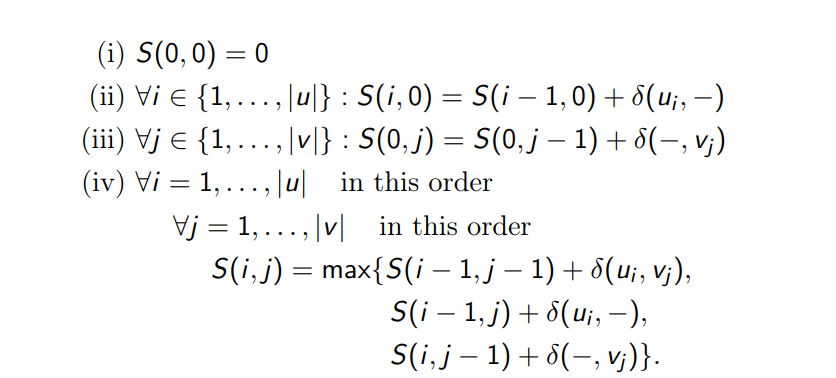

### Implementation

In [1]:
import random
from tabulate import tabulate


class NeedlemanWunsch:
    

    def _matrix_computation(self, result, i, j):
        """
        Needleman-Wunsch algorithm computes S(i, j) in R(real numbers) for all
        
        i in {0,..., |u|} and j in {0,..., |v|} as follows:
            (i) S(0, 0) = 0
            (ii) for all i in {1,..., |u|} : S(i, 0) = S(i  1, 0) + (ui, )
            (iii) for all j in {1,..., |v|} : S(0, j) = S(0, j  1) + (, vj)
            (iv) for all i = 1,..., |u| in this order
                 for all j = 1,..., |v| in this order
        
                    S(i, j) = max{S(i  1, j  1) + (ui, vj),
                    S(i  1, j) + (ui, ),
                    S(i, j  1) + (, vj)}
       
        """
        return max(result[i-1][j-1] +
                   self._helper_weighting(self._dna_two[i-1],
                                     self._dna_one[j-1]),
                   result[i-1][j] + self.gap,
                   result[i][j-1] + self.gap)

    def _helper_weighting(self, string_one, string_two):
        """
       Helper function such that two characters have a likeness score with respect to the 
       scoring system

        Arguments:
            string_one : A string, i.e. character
            string_two : A string i.e. character 

        """
        if string_one == string_two:
            return self.match
        else:
            return self.mismatch

    def generate(self, dna_one, dna_two):
        """
        Matrix generation with respect to the algorithm

        Arguments:
            dna_one : {A,T,C,G} string 
            dna_two : {A,T,C,G} string 
        """
        # Unfortunately requires first sequence is longer than second, add a 0 to the first DNA sequence to tabulate
        if len(dna_two) > len(dna_one):
            dna_one, dna_two = dna_two, dna_one
        self._dna_one = dna_one
        self._dna_two = dna_two
       
        result = [list(range(0, -len(dna_one) - 1, -1))]
        
        for i in range(-1, -len(dna_two) - 1, -1):
            row = [i]
            row.extend([0]*len(dna_one))
            result.append(row)
        
        for i in range(1, len(result)):
            for j in range(1, len(result[0])):
                result[i][j] = self._matrix_computation(result, i, j)
        # Formatting of matrix 
        for index, letter in enumerate(dna_two):
            result[index + 1].insert(0, letter)
        result[0].insert(0, ' ')
        result.insert(0, list("  " + dna_one))
        return result

    def __init__(self, match=1, mismatch=-0.5, gap=-0.5):
        """
        Initialisation of the matrix weightings, input delta values here, 
        initial values set to δ(x, y) = 1, for x = y, δ(x, −) = −0.5, δ(−, y) = −0.5, and δ(x, y) = 0 otherwise
        
        """
        self.match = match
        self.mismatch = mismatch
        self.gap = gap
        self._dna_one = ""
        self._dna_two = ""




def main():
    """
Input your nucleotide base sequence here, add 0 to first dna sequence as the list requires length
of first input to be longer than the second

    """
    needleman_wunsch = NeedlemanWunsch()
    dna_one = '0CAAAGACCTGAAGAGCCAGTGGACTCCACCCCACTTTCTGGTCTGACCAATAT'
    dna_two = 'ACCACACTCTCTGGGCTGACCAATTACAGCGCTTCTACAGAACTGAAGACTCAC'

    data = needleman_wunsch.generate(dna_one, dna_two)
    print(tabulate(data, headers="firstrow"))


if __name__ == '__main__':
    main()

              0      C      A      A      A      G      A      C      C      T      G      A      A      G      A      G      C      C      A      G      T      G      G      A      C      T      C      C      A      C      C      C      C      A      C      T      T      T      C      T      G      G      T      C      T      G      A      C      C      A      A      T      A      T
---  ---  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
       0   -1     -2     -3     -4     -5     -6     -7     -8     -9    -10    -11    -12    -13    -14    -15    -16    -17    -18    -19    -20    -21    -22    -23    -24    -25    -26    -27    -28    -29    -30    -31   